<a href="https://colab.research.google.com/github/Sangyeonglee353/ai-hongong/blob/main/Chapter_09_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch09-1 | 순차 데이터와 순환 신경망

# Ch09-2 | 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 리뷰 데이터셋

In [1]:
# 1. IMDB 리뷰 데이터셋 가져오기
# [참고] imdb.load_data: 전체 어휘 사전에 있는 단어를 등장 순서대로 나열한 다음 가장 많이 등장한 {num_words} 단어 선택
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
# 2. 훈련 세트와 테스트 세트 크기 확인
## 리뷰 텍스트 길이가 제각각 -> 별도의 파이썬 리스트로 넘파이 배열로 보관 -> 메모리 효율적 사용
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
# 3-1. 첫 번째 리뷰 길이 확인
## [참고] 넘파이 배열: 정수나 실수 외에도 파이썬 객체로 담을 수 있음.
print(len(train_input[0]))

218


In [5]:
# 3-2. 두 번째 리뷰 길이 확인
print(len(train_input[1]))

189


In [6]:
# 3-3. 첫 번째 리뷰에 담긴 내용 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 4. 타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
# 긍정(0), 부정(1) 판단 -> 이진분류 문제
# 5. 훈련 세트와 검증 세트 분리(8:2)
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
# 6. 훈련 세트 조사
# 6.1 리뷰의 길이 계산 for 평균 리뷰 길이, 최소 리뷰 길이, 최대 리뷰 길이 확인
import numpy as np
lengths = np.array([len(x) for x in train_input])

# 6.2 리뷰 길이의 평균과 중간값 구하기
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


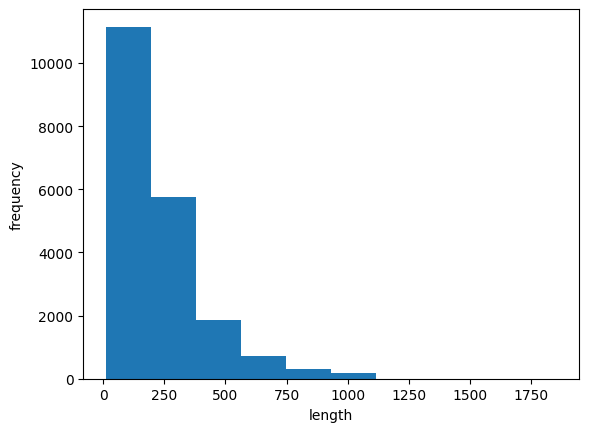

In [10]:
# 6.3 lengths 배열 > 히스토그램으로 표현
## [결과 해석] 대부분 리뷰 길이 300미만, 대부분 짧으므로 100개의 단어만 사용
## [결과 해석] 단, 100보다 작은 리뷰는 패딩(0)으로 길이를 맞춤.
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
# 7. 길이 100으로 조정
# 7.1 길이 조정
# [참고] pad_sequence(): 길이가 짧으면 앞부분을 0으로 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

# 7.2 train_seq 크기 확인
print(train_seq.shape)

(20000, 100)


In [12]:
# 7.3 첫 번째 샘플 출력
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [13]:
# 7.4 원본 샘플 끝 확인(잘린 부분 체크)
## [결과 해석] 앞 부분이 짤림. 뒷 부분과 일치하므로
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [14]:
# 7.5 여섯 번째 샘플 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
# 7.6 검증 세트의 길이도 100으로 조정
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

In [17]:
# 1. SimpleRNN 클래스 사용
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid')) # 이진 분류이므로, 활성화 함수: sigmoid

In [18]:
# 2. 원-핫 인코딩
# 2.1 인코딩 진행
train_oh = keras.utils.to_categorical(train_seq)

# 2.2 배열 크기 확인
print(train_oh.shape)

(20000, 100, 300)


In [19]:
# 2.3 인코딩 결과 확인
# 첫 번째 토큰의 10의 인코딩 확인
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
# 2.4 나머지가 모두 0인지 확인
print(np.sum(train_oh[0][0]))

1.0


In [21]:
# 2.5 검증 세트의 원-핫 인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
# 2.6 모델 구조 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 2472      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 순환 신경망 훈련하기

In [24]:
# 1. 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 38ms/step - loss: 0.7033 - accuracy: 0.5033 - val_loss: 0.6985 - val_accuracy: 0.5094
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.7053 - accuracy: 0.4911

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 10s 32ms/step - loss: 0.6961 - accuracy: 0.5103 - val_loss: 0.6955 - val_accuracy: 0.5176
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6927 - accuracy: 0.5196 - val_loss: 0.6929 - val_accuracy: 0.5220
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6898 - accuracy: 0.5319 - val_loss: 0.6904 - val_accuracy: 0.5312
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6867 - accuracy: 0.5440 - val_loss: 0.6870 - val_accuracy: 0.5448
Epoch 6/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6824 - accuracy: 0.5604 - val_loss: 0.6815 - val_accuracy: 0.5634
Epoch 7/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6743 - accuracy: 0.5848 - val_loss: 0.6696 - val_accuracy: 0.6074
Epoch 8/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6591 - accuracy: 0.6217 - val_loss: 0.6541 - val_accuracy: 0.6306
Ep

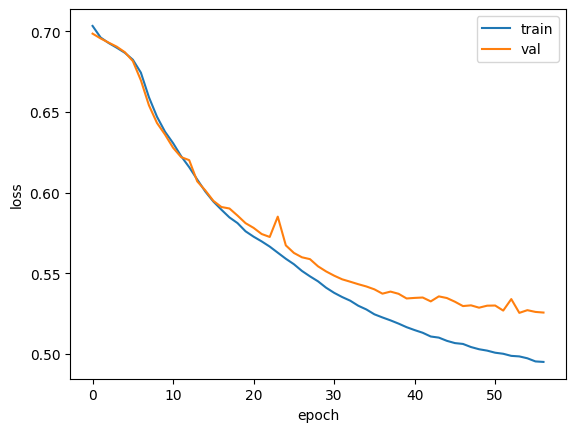

In [25]:
# 2. 훈련 손실과 검증 손실 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
# 3. train_seq 배열과 train_oh 배열의 nbytes 속성으로 크기 확인
# [참고] 원-핫 인코딩의 단점: 입력 데이터가 엄청 커짐
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


## 단어 임베딩을 사용하기

In [29]:
# 1. 두 번째 순환 신경망 만들기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [30]:
# 2. 모델 구조 출력
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           4800      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# 3. 모델 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 27ms/step - loss: 0.6960 - accuracy: 0.5078 - val_loss: 0.6942 - val_accuracy: 0.5088
Epoch 2/100
  7/313 [..............................] - ETA: 5s - loss: 0.6936 - accuracy: 0.5335

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 13s 41ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.5066
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6893 - accuracy: 0.5389 - val_loss: 0.6916 - val_accuracy: 0.5162
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6865 - accuracy: 0.5566 - val_loss: 0.6899 - val_accuracy: 0.5276
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6825 - accuracy: 0.5724 - val_loss: 0.6858 - val_accuracy: 0.5560
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6752 - accuracy: 0.5993 - val_loss: 0.6759 - val_accuracy: 0.5958
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6623 - accuracy: 0.6340 - val_loss: 0.6630 - val_accuracy: 0.6352
Epoch 8/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6475 - accuracy: 0.6635 - val_loss: 0.6473 - val_accuracy: 0.6654
E

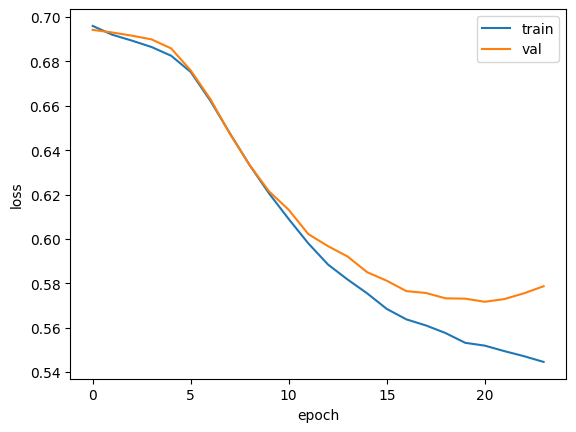

In [33]:
# 4. 훈련 손실과 검증 손실 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Ch09-3 | LSTM과 GRU 셀